In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

<h4>Exploratory Data Analysis</h4>

In [2]:
# Import the json file
logins = pd.read_json("logins.json")
# Change the format to data time format to further proceed -
logins = logins.apply(pd.to_datetime).set_index(logins['login_time'])

In [3]:
logins.head()

,login_time
login_time,
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


In [5]:
logins.tail()

,login_time
login_time,
1970-04-13 18:50:19,1970-04-13 18:50:19
1970-04-13 18:43:56,1970-04-13 18:43:56
1970-04-13 18:54:02,1970-04-13 18:54:02
1970-04-13 18:57:38,1970-04-13 18:57:38
1970-04-13 18:54:23,1970-04-13 18:54:23


In [21]:
min_15 = logins.resample('15min').count()
daily = logins.resample('D').count()
weekly = logins.resample('W').count()
monthly = logins.resample('M').count()


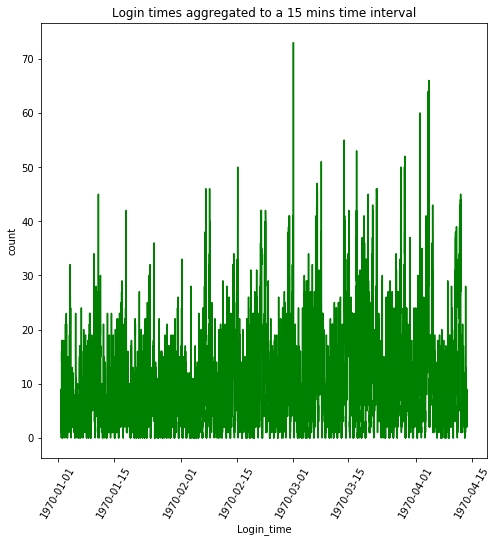

In [14]:
# Plotting the login time intervals for 15 mins a piece
plt.figure(figsize = (8,8))
plt.plot(min_15.index, min_15['login_time'], 'g-')
plt.title('Login times aggregated to a 15 mins time interval')
plt.xlabel('Login_time')
plt.ylabel('count')
plt.xticks(rotation = 60)
plt.show()

The login increases and decreases keeping max level at mid-weeks time.
There is a steady increase in logins till the begining of april and it slightly receeds. In the mid weeks of march the login count reached all time high before they started to slightly decline. 

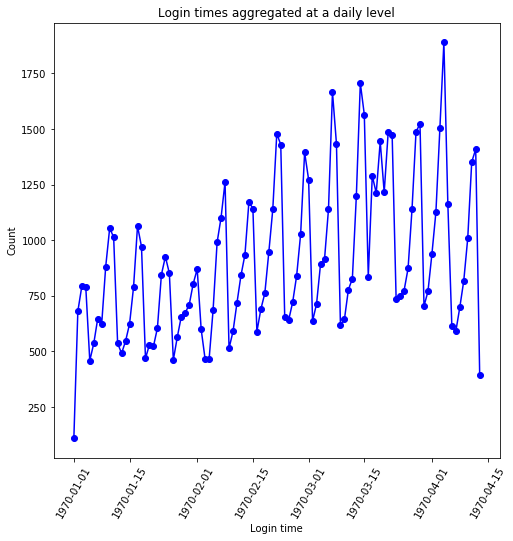

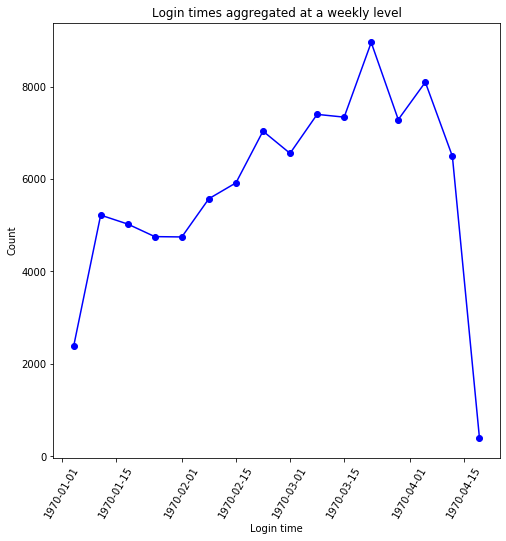

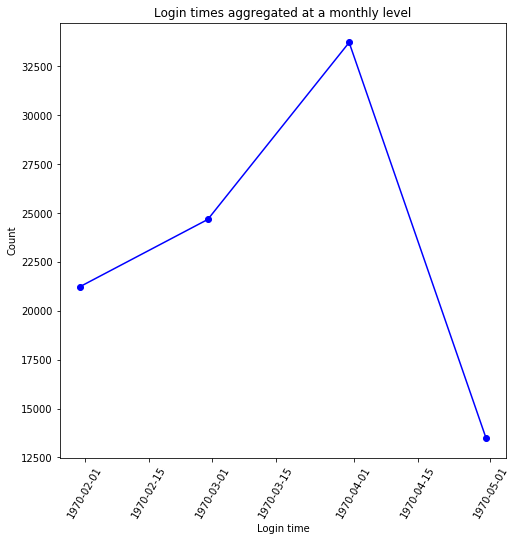

In [22]:
# plt.rcParams['figure.figsize'] = 8,8
fig, ax1 = plt.subplots()
ax1.plot(daily.index, daily['login_time'], 'b-', marker = 'o')
ax1.set_title('Login times aggregated at a daily level')
ax1.set_xlabel('Login time')
ax1.set_ylabel('Count')
plt.xticks(rotation = 60)
plt.show()


# plt.rcParams['figure.figsize'] = 8,8
fig, ax2 = plt.subplots()
ax2.plot(weekly.index, weekly['login_time'], 'b-', marker = 'o')
ax2.set_title('Login times aggregated at a weekly level')
ax2.set_xlabel('Login time')
ax2.set_ylabel('Count')
plt.xticks(rotation = 60)
plt.show()


# plt.rcParams['figure.figsize'] = 8,8
fig, ax3 = plt.subplots()
ax3.plot(monthly.index, monthly['login_time'], 'b-', marker = 'o')
ax3.set_title('Login times aggregated at a monthly level')
ax3.set_xlabel('Login time')
ax3.set_ylabel('Count')
plt.xticks(rotation = 60)
plt.show()

Part 2 - Experiment and metrics design 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on weekdays, Ultimate Gotham is most active at night, 
and Ultimate Metropolis is most active during the day. 

On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. 

The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 
<p>
	1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?<br><br>
	2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.
</p>

Please provide details on:<br> 
	a. how you will implement the experiment <br>
	b. what statistical test(s) you will conduct to verify the significance of the observation <br>
	c. how you would interpret the results and provide recommendations to the city operations team along with any caveats

1. The key metric that can be used to calculate the success of this reform will be the revenue generated by the rider before and after reimbursement of the toll money. Get the mean of revenue generated by the rider before the reimbursement scheme and mean of revenue generated by the rider after the reimbursement scheme. If the revenue generated by the rider post implementation of reimbursement is higher then we can say that the scheme is a success.


2. Doing a two sample test be the experiment to compare the effectiveness of the proposed change.

a. Take a sample containing, say 100 divers that have to pay toll and 100 drivers that do not have to pay toll.<br>
b & c. Null Hypothesis - There is no change in mean value of the revenue of the rider.
Alternate Hypothesis - The mean revenue generated by rider post reimbursement is higher.
Should make sure that the samples taken in the first sample is equal to the population mean.
If P-value of difference in means is less that 0.05 then mean of sample 2 is greater and the reimbursement scheme is a success.
If P-value of difference in means is greater than 0.05 then reimbursement cuts do not change any revenue metric.

In [33]:
import json
# Import the json file
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df_rider = pd.DataFrame(data)
df_rider.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [34]:
categorical = ['city', 'phone']
df_rider = pd.get_dummies(df_rider, columns = categorical)
date_column = ['last_trip_date', 'signup_date']
for col in date_column:
    df_rider[col] = pd.to_datetime(df_rider[col])
df_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), uint8(5)
memory usage: 3.7 MB


In [35]:
df_rider = df_rider.dropna()
df_rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 15 columns):
trips_in_first_30_days    41744 non-null int64
signup_date               41744 non-null datetime64[ns]
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
last_trip_date            41744 non-null datetime64[ns]
surge_pct                 41744 non-null float64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
city_Astapor              41744 non-null uint8
city_King's Landing       41744 non-null uint8
city_Winterfell           41744 non-null uint8
phone_Android             41744 non-null uint8
phone_iPhone              41744 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), uint8(5)
memory usage: 3.4 MB


In [36]:
df_rider.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,2.611393,4.601801,1.073697,8.884695,61.304437,5.465312,4.776648,0.325795,0.211503,0.462701,0.289694,0.703143
std,4.060121,0.616079,0.198681,18.309042,34.799944,5.149810,0.404109,0.468677,0.408379,0.498613,0.453626,0.456878
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.790000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df_rider['retention'] = np.where((df_rider['last_trip_date'] > '2014--06-01'), 1, 0)

In [38]:
sum(df_rider.retention)/len(df_rider)

0.4007282483710234

Unnecessary columns for the prediction task will be removed. The last trip date feature will be removed because the retention label (dependent variable). 

In [39]:
df_rider = df_rider.drop('last_trip_date', axis=1)

In [40]:
df_rider.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,retention
0,4,2014-01-25,4.7,1.10,15.4,True,46.2,3.67,5.0,0,1,0,0,1,1
1,0,2014-01-29,5.0,1.00,0.0,False,50.0,8.26,5.0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,0.0,False,100.0,0.77,5.0,1,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,20.0,True,80.0,2.36,4.9,0,1,0,0,1,1
4,14,2014-01-27,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,1,1,0,0


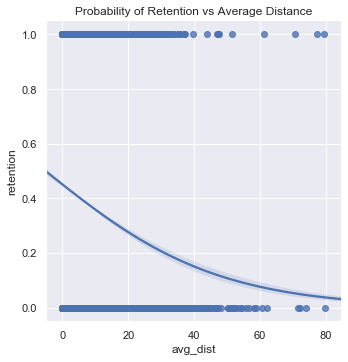

In [44]:
# Relationship between Retention vs Average Distance
sns.lmplot('avg_dist', 'retention', df_rider, logistic = True)
plt.title('Probability of Retention vs Average Distance')
plt.show()

As average distance of the driver increases the probability of retention goes down.

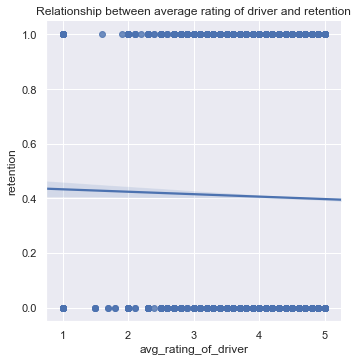

In [45]:
# Relationship between average rating of driver and retention
sns.lmplot('avg_rating_of_driver', 'retention', data=df_rider)
plt.title('Relationship between average rating of driver and retention')
plt.show()

There is a slight relationship where the retention decreases with respect to increase in average ratings.

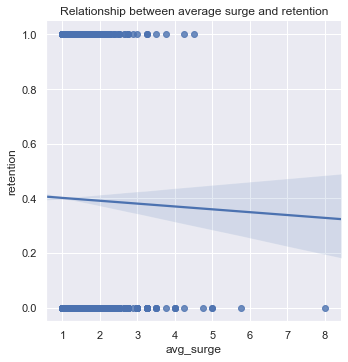

In [46]:
# Relationship between average surge and retention
sns.lmplot('avg_surge', 'retention', data=df_rider)
plt.title('Relationship between average surge and retention')
plt.show()

Increase in surge leads to high retention.

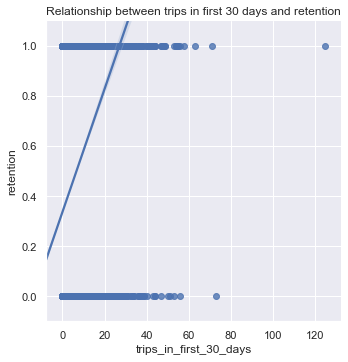

In [53]:
a = sns.lmplot('trips_in_first_30_days', 'retention', data = df_rider)
a.set(ylim=(-0.1, 1.1))
plt.title('Relationship between trips in first 30 days and retention')
plt.show()

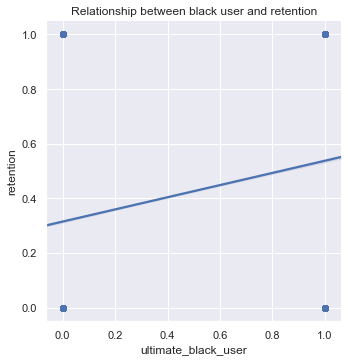

In [49]:
sns.lmplot('ultimate_black_user', 'retention', data = df_rider)
plt.title('Relationship between black user and retention')
plt.show()

Text(0.5, 1.0, 'Retention Rate for Ultimate Black Users and Non-users')

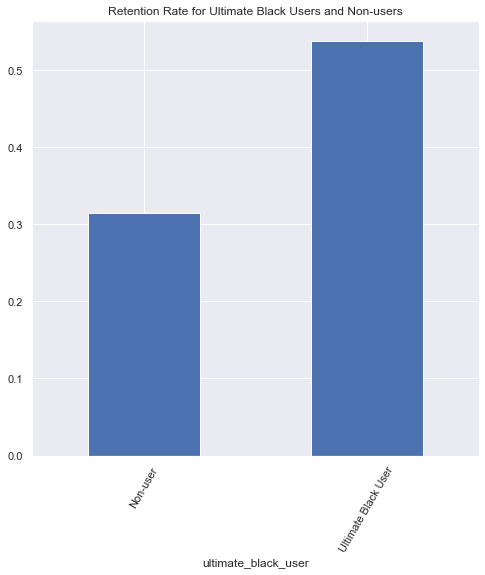

In [54]:
black_user=df_rider.groupby('ultimate_black_user').mean()['retention']
ax, fig=plt.subplots()

black_user.plot(kind='bar')
plt.xticks((0, 1), ('Non-user', 'Ultimate Black User'), rotation=60)
plt.title('Retention Rate for Ultimate Black Users and Non-users')

Text(0.5, 1.0, 'Retention Rate by City of User Signup')

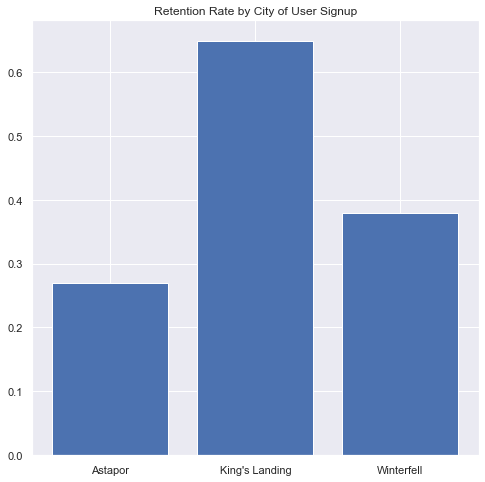

In [55]:
cities=['city_Astapor', 'city_King\'s Landing', 'city_Winterfell']
retention_by_city=[]
for city in cities:
    retention=(df_rider.groupby(city).mean()['retention'].iloc[1])
    retention_by_city.append(retention)

plt.bar(['Astapor', 'King\'s Landing', 'Winterfell'], retention_by_city)
plt.title('Retention Rate by City of User Signup')

Text(0.5, 1.0, 'Retention Rate by Type of Phone')

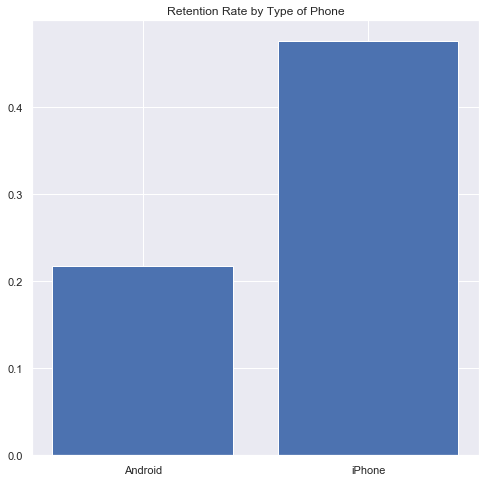

In [56]:
phones=['phone_Android', 'phone_iPhone']
retention_by_phone=[]
for phone in phones:
    retention=(df_rider.groupby(phone).mean()['retention'].iloc[1])
    retention_by_phone.append(retention)

plt.bar(['Android', 'iPhone'], retention_by_phone)
plt.title('Retention Rate by Type of Phone')

<h4> Part 3 - Prediction </h4>

In [71]:
y=df_rider['retention']
X=df_rider.drop(['retention', 'signup_date'], axis=1)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 13 columns):
trips_in_first_30_days    41744 non-null int64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
surge_pct                 41744 non-null float64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
city_Astapor              41744 non-null uint8
city_King's Landing       41744 non-null uint8
city_Winterfell           41744 non-null uint8
phone_Android             41744 non-null uint8
phone_iPhone              41744 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(5)
memory usage: 2.8 MB


In [73]:
X.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,2.611393,4.601801,1.073697,8.884695,61.304437,5.465312,4.776648,0.325795,0.211503,0.462701,0.289694,0.703143
std,4.060121,0.616079,0.198681,18.309042,34.799944,5.149810,0.404109,0.468677,0.408379,0.498613,0.453626,0.456878
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.790000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter = 1000)

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[8189 1817]
 [3091 3601]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     10006
           1       0.66      0.54      0.59      6692

    accuracy                           0.71     16698
   macro avg       0.70      0.68      0.68     16698
weighted avg       0.70      0.71      0.70     16698



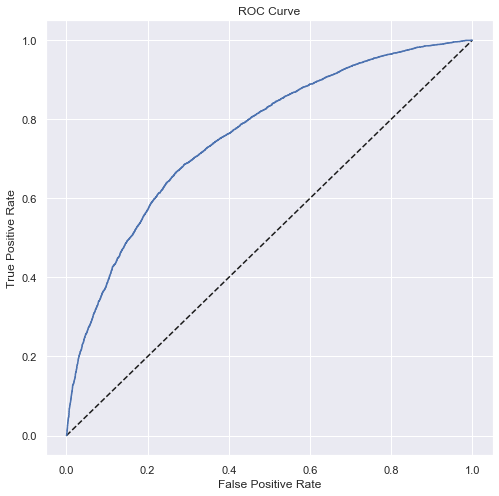

In [76]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7590965519313636
AUC scores computed using 5-fold cross-validation: [0.76693488 0.76447479 0.75908098 0.76592603 0.77010708]


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

rfe = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 45, 45, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [50, 60, 70, 80]
}

clf = GridSearchCV(estimator = rfe, param_grid = param_grid, cv = 3, verbose = 2)

# clf = GridSearchCV(rfc, cv=5)
clf.fit(X_train, y_train)

print('Best Parameters: ', clf.best_estimator_.steps[-1][1])
print(name, ' Feature Importances: ', sorted(list(zip(X.columns, clf.best_estimator_.steps[-1][1].feature_importances_)),
                                             key=lambda x: x[1], reverse=True)[0:5])

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   1.7s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   1.7s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf

[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.3s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.3s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=60, total=   1.6s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=60, total=   1.6s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf

[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50, total=   1.3s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50, total=   1.3s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=60, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=60, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.7s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.7s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   2.0s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   2.0s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.6s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.6s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=60, total=   1.9s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=60, total=   1.9s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=50, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=50, total=   1.5s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=60, total=   1.8s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=60, total=   1.8s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf

[CV]  bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   1.7s
[CV] bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60, total=   1.7s
[CV] bootstrap=True, max_depth=45, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  bootstrap=True, max_depth=45, max_features=2, min_samples_leaf

KeyboardInterrupt: 